In [92]:
import pandas as pd

In [93]:
# arima: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

#stochastic model

#stationary model

#The stochastic model for which the exponentially weighted moving average
#forecast yields minimum mean square error [212] is a member of a class of nonstationary processes called autoregressive integrated moving average (ARIMA)
#processes, which are discussed in Chapter 4.

#. This wider class of processes provides
#a range of models, stationary and nonstationary, that adequately represent many of
#the time series met in practice.

#As shown
#in Chapter 5, once an appropriate model has been determined for the series, the
#optimal forecasting procedure follows immediately. These forecasting procedures
#include the exponentially weighted moving average forecast as a special case.

In [94]:
df = pd.read_csv(filepath_or_buffer='/home/lneves/Documents/TCC/final_df.csv')

In [95]:
df = df[(df['Date'] <= '2022-07-18') & (df['Date'] >= '2017-01-01')]

In [96]:
df.set_index('Date', inplace=True)

In [97]:
df.count()

Unnamed: 0    1233
Close         1233
Price         1233
dtype: int64

In [98]:
df1 = df[['Close','Price']]

In [99]:
import numpy as np

matrix = np.corrcoef(df1['Close'],df['Price'])

In [100]:
matrix

array([[1.        , 0.81416711],
       [0.81416711, 1.        ]])

In [101]:
df1.head()

,Close,Price
Date,,
2017-01-02,67136.0,3.2857
2017-01-03,66777.0,3.2652
2017-01-04,66898.0,3.2163
2017-01-05,67940.0,3.1990
2017-01-06,67899.0,3.2241


In [102]:
#univariável

df2 = df1['Close']

In [103]:
#Running the example, we can see that there is a positive correlation 
# with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

#A good starting point for the AR parameter of the model may be 5.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

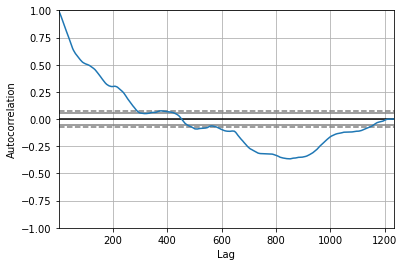

In [104]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df2)

In [105]:
from statsmodels.tsa.arima.model import ARIMA

#autoregression = 1000
autoreg = 100
#difference order of 1
diff = 1
#moving average model = 0
mam = 0

model = ARIMA(df2, order=(autoreg,1,0))
model_fit = model.fit()

print(model_fit.summary())

/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/home/lneves/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1233
Model:               ARIMA(100, 1, 0)   Log Likelihood              -10734.503
Date:                Sun, 07 Aug 2022   AIC                          21671.006
Time:                        10:52:38   BIC                          22187.762
Sample:                    01-02-2017   HQIC                         21865.411
                         - 09-22-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0803      0.013     -6.217      0.000      -0.106      -0.055
ar.L2          0.0363      0.018      2.062      0.039       0.002       0.071
ar.L3          0.0343      0.021      1.620      0.1

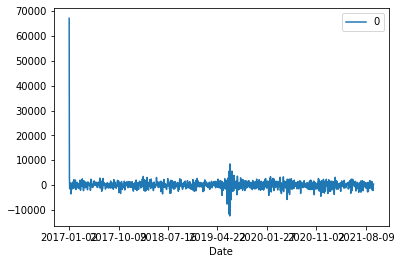

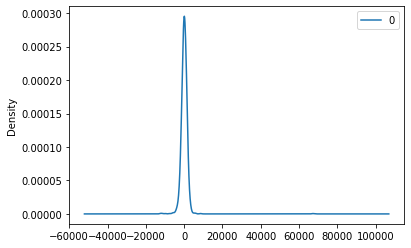

                  0
count   1233.000000
mean      88.024626
std     2411.518201
min   -12341.489533
25%     -732.196184
50%       77.165447
75%      912.381463
max    67136.000000


In [106]:
from matplotlib import pyplot
from pandas import DataFrame

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=97445.761765, expected=100774.000000
predicted=100749.491532, expected=100799.000000
predicted=100907.311067, expected=103913.000000
predicted=103838.021497, expected=105351.000000
predicted=105431.497597, expected=104532.000000
predicted=104865.829327, expected=102175.000000
predicted=102361.136939, expected=104512.000000
predicted=104294.381000, expected=106430.000000
predicted=106326.495096, expected=107229.000000
predicted=107313.331952, expected=106483.000000
predicted=106568.666931, expected=106517.000000
predicted=106585.324717, expected=107379.000000
predicted=107345.861374, expected=109786.000000
predicted=109667.801880, expected=110133.000000
predicted=110207.120273, expected=110227.000000
predicted=110325.635433, expected=110575.000000
predicted=110593.364008, expected=108888.000000
predicted=109103.951725, expected=111335.000000
predicted=111113.980342, expected=111814.000000
predicted=111808.997033, expected=112919.000000
predicted=112960.536976, expected=113682.

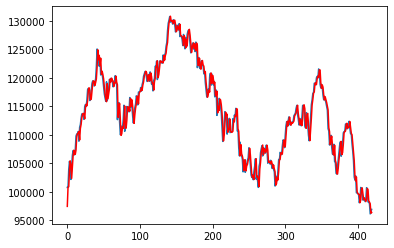

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt

series = df1['Close']
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()